In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [41]:
df = pd.read_csv("iris.csv")   #reading the csv file
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## EUCLIDEAN DISTANCE AND K-nearest neighbors

In [42]:
setosa_variety = df[df["variety"] == "Setosa"]  #boolean masking to identify the setosa variety
setosa_variety

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [43]:
versicolor_variety = df[df["variety"] == "Versicolor"]    #boolean masking to identify the Versicolor variety
versicolor_variety

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor
57,4.9,2.4,3.3,1.0,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor


In [44]:
virginica_variety = df[df["variety"] == "Virginica"]      #boolean masking to identify Virginica variety
virginica_variety

,sepal.length,sepal.width,petal.length,petal.width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica
105,7.6,3.0,6.6,2.1,Virginica
106,4.9,2.5,4.5,1.7,Virginica
107,7.3,2.9,6.3,1.8,Virginica
108,6.7,2.5,5.8,1.8,Virginica
109,7.2,3.6,6.1,2.5,Virginica


In [45]:
#i)
testing_data = pd.concat([df[:][0:3] , df[:][50:53] , df[:][100:103] ])   #testing data
testing_data.index = [i for i in range(len(testing_data))]
testing_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,7.0,3.2,4.7,1.4,Versicolor
4,6.4,3.2,4.5,1.5,Versicolor
5,6.9,3.1,4.9,1.5,Versicolor
6,6.3,3.3,6.0,2.5,Virginica
7,5.8,2.7,5.1,1.9,Virginica
8,7.1,3.0,5.9,2.1,Virginica


In [46]:
training_data = pd.concat([ setosa_variety[:][3:], versicolor_variety[:][3:],virginica_variety[:][3:]])  #training data
training_data
training_data.index = [i for i in range(141)]
training_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,4.6,3.1,1.5,0.2,Setosa
1,5.0,3.6,1.4,0.2,Setosa
2,5.4,3.9,1.7,0.4,Setosa
3,4.6,3.4,1.4,0.3,Setosa
4,5.0,3.4,1.5,0.2,Setosa
...,...,...,...,...,...
136,6.7,3.0,5.2,2.3,Virginica
137,6.3,2.5,5.0,1.9,Virginica
138,6.5,3.0,5.2,2.0,Virginica
139,6.2,3.4,5.4,2.3,Virginica


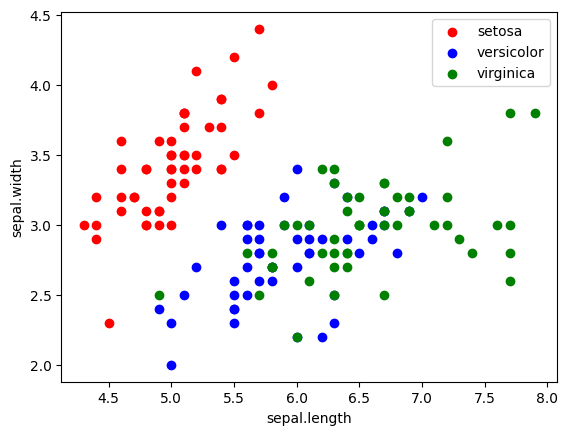

In [47]:
#ii)
#Scatter plot

#X-axis represents sepal.length and Y-axis represents sepal.width

plt.scatter(setosa_variety["sepal.length"],setosa_variety["sepal.width"],c = "red",label="setosa")
plt.scatter(versicolor_variety["sepal.length"],versicolor_variety["sepal.width"],c = "blue",label="versicolor")
plt.scatter(virginica_variety["sepal.length"],virginica_variety["sepal.width"],c = "green",label="virginica")
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.legend()

## Inferences:

### Case 1: Only Sepal Length and Sepal Width Considered
- For values of k ranging from 15 to 70, the accuracy was found to be **55.56%**.

### Case 2: All Four Parameters Considered
- For k values between **5 and 20**, the accuracy achieved was **100%**.
- For k values between **25 and 40**, the accuracy dropped to **88.89%**.
- For k values between **45 and 65**, the accuracy was **77.78%**.
- For **k = 70**, the accuracy decreased further to **66.67%**.


In [48]:
def compute_distance(a,b):
    #print(a,b)
    dis = 0
    for i in range(len(a)):
        dis = dis + (a[i] - b[i])**2
    return math.sqrt(dis)

compute_distance((3,4),(6,9))

5.830951894845301

In [49]:
correct_class_count = 0

def perform_classification(distances):
    distances.sort()
    K_nearest_neighbours = distances[0:20]
    classes = {}
    

    for ele in K_nearest_neighbours:
        if ele[1] not in classes:
            classes[ele[1]] = 0
        classes[ele[1]]+=1
    
    print(classes)
    class_label = max(classes, key=classes.get)
    return class_label

In [50]:
def find_accuracy(true_label,predicted_label):
    global correct_class_count
    if true_label == predicted_label:
        correct_class_count+=1

In [51]:
#Only for sepal.length and sepal.width


for i in range(len(testing_data)):

    sample1 = testing_data.iloc[[i],[0,1]]
    sample1
    distances = []
    
    for j in range(len(training_data)):
        a = (sample1["sepal.length"][i],sample1["sepal.width"][i])
        curr_training_sample = training_data.iloc[[j],[0,1]]
        b = (curr_training_sample["sepal.length"][j],curr_training_sample["sepal.width"][j])
        distances.append((compute_distance(a,b),training_data.iloc[[j],[4]]["variety"][j]))
    
    #print(a)
    #distances = np.array(distances)
    #print(distances)
    class_label = perform_classification(distances)
    find_accuracy(testing_data.iloc[[i],[4]]["variety"][i],class_label)
    print(f"Testing point number {i+1}")
    print(f"Actual variety is {testing_data.iloc[[i],[4]]["variety"][i]}")
    print(f"Predicted variety is {class_label}")
    print("********")

print(f"The accuracy is: {(correct_class_count/9)*100}%")


{'Setosa': 20}
Testing point number 1
Actual variety is Setosa
Predicted variety is Setosa
********
{'Setosa': 19, 'Versicolor': 1}
Testing point number 2
Actual variety is Setosa
Predicted variety is Setosa
********
{'Setosa': 20}
Testing point number 3
Actual variety is Setosa
Predicted variety is Setosa
********
{'Virginica': 14, 'Versicolor': 6}
Testing point number 4
Actual variety is Versicolor
Predicted variety is Virginica
********
{'Virginica': 13, 'Versicolor': 7}
Testing point number 5
Actual variety is Versicolor
Predicted variety is Virginica
********
{'Virginica': 14, 'Versicolor': 6}
Testing point number 6
Actual variety is Versicolor
Predicted variety is Virginica
********
{'Versicolor': 7, 'Virginica': 13}
Testing point number 7
Actual variety is Virginica
Predicted variety is Virginica
********
{'Versicolor': 16, 'Virginica': 4}
Testing point number 8
Actual variety is Virginica
Predicted variety is Versicolor
********
{'Virginica': 14, 'Versicolor': 6}
Testing point 

In [52]:
# We should now follow the same for all four features

#sepal.length and petal.length
correct_class_count = 0
for i in range(len(testing_data)):

    sample1 = testing_data.iloc[[i],[0,1,2,3]]
    sample1
    distances = []
    
    for j in range(len(training_data)):
        a = (sample1["sepal.length"][i],sample1["sepal.width"][i],sample1["petal.length"][i],sample1["petal.width"][i])
        curr_training_sample = training_data.iloc[[j],[0,1,2,3]]
        b = (curr_training_sample["sepal.length"][j],curr_training_sample["sepal.width"][j],curr_training_sample["petal.length"],
            curr_training_sample["petal.width"])
        distances.append((compute_distance(a,b),training_data.iloc[[j],[4]]["variety"][j]))
    
    #print(a)
    #distances = np.array(distances)
    #print(distances)
    class_label = perform_classification(distances)
    find_accuracy(testing_data.iloc[[i],[4]]["variety"][i],class_label)
    print(f"Testing point number {i+1}")
    print(f"Actual variety is {testing_data.iloc[[i],[4]]["variety"][i]}")
    print(f"Predicted variety is {class_label}")
    print("********")

print(f"The accuracy is: {(correct_class_count/9)*100}%")
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\2275147098.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dis)


{'Setosa': 20}
Testing point number 1
Actual variety is Setosa
Predicted variety is Setosa
********
{'Setosa': 20}
Testing point number 2
Actual variety is Setosa
Predicted variety is Setosa
********
{'Setosa': 20}
Testing point number 3
Actual variety is Setosa
Predicted variety is Setosa
********
{'Versicolor': 13, 'Virginica': 7}
Testing point number 4
Actual variety is Versicolor
Predicted variety is Versicolor
********
{'Versicolor': 17, 'Virginica': 3}
Testing point number 5
Actual variety is Versicolor
Predicted variety is Versicolor
********
{'Versicolor': 10, 'Virginica': 10}
Testing point number 6
Actual variety is Versicolor
Predicted variety is Versicolor
********
{'Virginica': 20}
Testing point number 7
Actual variety is Virginica
Predicted variety is Virginica
********
{'Virginica': 15, 'Versicolor': 5}
Testing point number 8
Actual variety is Virginica
Predicted variety is Virginica
********
{'Virginica': 20}
Testing point number 9
Actual variety is Virginica
Predicted v

In [53]:
#sklearn knn for all features


from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Create empty lists for features and labels
X = []
y = []

# Extract features and labels from training_data
for i in range(len(training_data)):
    current_sample = training_data.iloc[i]
    # Append feature vector to X
    X.append([current_sample["sepal.length"], current_sample["sepal.width"], 
              current_sample["petal.length"], current_sample["petal.width"]])
    # Append label to y
    y.append(current_sample["variety"])

# Initialize and fit the KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X, y)

# Prepare testing data features
X_test = []
for i in range(len(testing_data)):
    current_sample = testing_data.iloc[i]
    X_test.append([current_sample["sepal.length"], current_sample["sepal.width"], 
                   current_sample["petal.length"], current_sample["petal.width"]])

# Predict labels for testing data
predictions = neigh.predict(X_test)
# predictions
# Compare predictions with actual values
y_test = testing_data["variety"].tolist()
correct_class_count = sum(pred == actual for pred, actual in zip(predictions, y_test))
accuracy = (correct_class_count / len(testing_data)) * 100

print(f"The accuracy is: {accuracy}%")


The accuracy is: 100.0%


In [54]:
#sklearn knn for sepal.length and sepal.width


from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Create empty lists for features and labels
X = []
y = []

# Extract features and labels from training_data
for i in range(len(training_data)):
    current_sample = training_data.iloc[i]
    # Append feature vector to X
    X.append([current_sample["sepal.length"], current_sample["sepal.width"]])
    # Append label to y
    y.append(current_sample["variety"])

# Initialize and fit the KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

# Prepare testing data features
X_test = []
for i in range(len(testing_data)):
    current_sample = testing_data.iloc[i]
    X_test.append([current_sample["sepal.length"], current_sample["sepal.width"]])

# Predict labels for testing data
predictions = neigh.predict(X_test)
predictions
# Compare predictions with actual values
y_test = testing_data["variety"].tolist()
correct_class_count = sum(pred == actual for pred, actual in zip(predictions, y_test))
accuracy = (correct_class_count / len(testing_data)) * 100


print(f"The accuracy is: {accuracy}%")


The accuracy is: 55.55555555555556%


## MAHALANOBIS DISTANCE

In [55]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
training_data = pd.concat([df[:][1:50] , df[:][51:100] , df[:][101:] ])
training_data

,sepal.length,sepal.width,petal.length,petal.width,variety
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [57]:
testing_data = pd.concat([df[:][0:1] , df[:][50:51] , df[:][100:101] ])   #testing_data
testing_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


In [58]:
setosa_variety.drop(["variety"],axis=1,inplace=True)
versicolor_variety.drop(["variety"],axis=1,inplace=True)
virginica_variety.drop(["variety"],axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\4204481990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa_variety.drop(["variety"],axis=1,inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\4204481990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versicolor_variety.drop(["variety"],axis=1,inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\4204481990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [59]:
setosa_mean = setosa_variety.mean(numeric_only=True)   #finding the mean
setosa_mean

sepal.length    5.006
sepal.width     3.428
petal.length    1.462
petal.width     0.246
dtype: float64

In [60]:
versicolor_mean = versicolor_variety.mean(numeric_only=True)
versicolor_mean

sepal.length    5.936
sepal.width     2.770
petal.length    4.260
petal.width     1.326
dtype: float64

In [61]:
virginica_mean = virginica_variety.mean(numeric_only=True)
virginica_mean

sepal.length    6.588
sepal.width     2.974
petal.length    5.552
petal.width     2.026
dtype: float64

In [63]:
Z = setosa_variety.subtract(setosa_mean, axis = 1)
Z

,sepal.length,sepal.width,petal.length,petal.width
0,0.094,0.072,-0.062,-0.046
1,-0.106,-0.428,-0.062,-0.046
2,-0.306,-0.228,-0.162,-0.046
3,-0.406,-0.328,0.038,-0.046
4,-0.006,0.172,-0.062,-0.046
5,0.394,0.472,0.238,0.154
6,-0.406,-0.028,-0.062,0.054
7,-0.006,-0.028,0.038,-0.046
8,-0.606,-0.528,-0.062,-0.046
9,-0.106,-0.328,0.038,-0.146


In [64]:
Zt = Z.transpose()
covariance_matrix = (np.matmul(Zt,Z))/(len(setosa_variety) - 1)
covariance_matrix

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.124249,0.099216,0.016355,0.010331
sepal.width,0.099216,0.143690,0.011698,0.009298
petal.length,0.016355,0.011698,0.030159,0.006069
petal.width,0.010331,0.009298,0.006069,0.011106


In [65]:
covariance_matrix_inverse = np.linalg.inv(covariance_matrix)  
covariance_matrix_inverse

array([[ 18.94343879, -12.40482616,  -4.50020654,  -4.77612733],
       [-12.40482616,  15.57054017,   1.11107914,  -2.10409783],
       [ -4.50020654,   1.11107914,  38.77620413, -17.9350353 ],
       [ -4.77612733,  -2.10409783, -17.9350353 , 106.04590614]])

In [66]:
#a) Calculation with the first test data:
d1 = testing_data.iloc[0][:].drop(["variety"])
d1 = d1 - setosa_mean
dt = np.matmul(d1.transpose(),covariance_matrix_inverse)
d1 = np.matmul(dt,d1)
d1 = math.sqrt(d1)
d1

0.6701595252081853

In [67]:
#b) Calculating with the second test data:
d2 = testing_data.iloc[1][:].drop(["variety"])
d2 = d2 - setosa_mean
d2 = np.matmul(d2.transpose(),covariance_matrix_inverse)
d2 = np.matmul(dt,d2)
d2 = math.sqrt(abs(d2))
d2

19.905019043566295

In [68]:
#c) Calculating with the third test data:
d3 = testing_data.iloc[2][:].drop(["variety"])
d3 = d3 - setosa_mean
d3 = np.matmul(d3.transpose(),covariance_matrix_inverse)
d3 = np.matmul(dt,d3)
d3 = math.sqrt(abs(d3))
d3

30.304137505764594

In [69]:
Z = virginica_variety.subtract(virginica_mean, axis = 1)
Z

,sepal.length,sepal.width,petal.length,petal.width
100,-0.288,0.326,0.448,0.474
101,-0.788,-0.274,-0.452,-0.126
102,0.512,0.026,0.348,0.074
103,-0.288,-0.074,0.048,-0.226
104,-0.088,0.026,0.248,0.174
105,1.012,0.026,1.048,0.074
106,-1.688,-0.474,-1.052,-0.326
107,0.712,-0.074,0.748,-0.226
108,0.112,-0.474,0.248,-0.226
109,0.612,0.626,0.548,0.474


In [70]:
Zt = Z.transpose()
covariance_matrix = (np.matmul(Zt,Z))/(len(virginica_variety) - 1)
covariance_matrix

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.404343,0.093763,0.303290,0.049094
sepal.width,0.093763,0.104004,0.071380,0.047629
petal.length,0.303290,0.071380,0.304588,0.048824
petal.width,0.049094,0.047629,0.048824,0.075433


In [71]:
covariance_matrix_inverse = np.linalg.inv(covariance_matrix)
covariance_matrix_inverse

array([[10.5338668 , -3.47972624, -9.96014594,  1.78815223],
       [-3.47972624, 15.87544225,  1.1026887 , -8.47285053],
       [-9.96014594,  1.1026887 , 13.40582053, -2.89091847],
       [ 1.78815223, -8.47285053, -2.89091847, 19.31405035]])

In [72]:
#a) Calculation with the first test data:
d4 = testing_data.iloc[0][:].drop(["variety"])
print(d4)
d4 = d4 - virginica_mean
print(d4)
d4 = np.matmul(d4.transpose(),covariance_matrix_inverse)
d4 = np.matmul(dt,d4)
d4 = math.sqrt(d4)
d4

sepal.length    5.1
sepal.width     3.5
petal.length    1.4
petal.width     0.2
Name: 0, dtype: object
sepal.length   -1.488
sepal.width     0.526
petal.length   -4.152
petal.width    -1.826
dtype: object


15.10041880678387

In [73]:
#b) Calculating with the second test data:
d5 = testing_data.iloc[1][:].drop(["variety"])
d5 = d5 - virginica_mean
d5 = np.matmul(d5.transpose(),covariance_matrix_inverse)
d5 = np.matmul(dt,d5)
d5 = math.sqrt(d5)
d5

9.385897486856878

In [74]:
#c) Calculating with the third test data:
d6 = testing_data.iloc[2][:].drop(["variety"])
d6 = d6 - virginica_mean
d6 = np.matmul(d6.transpose(),covariance_matrix_inverse)
d6 = np.matmul(dt,d6)
d6 = math.sqrt(abs(d6))
d6

6.77931725664971

In [75]:
Z = versicolor_variety.subtract(versicolor_mean, axis = 1)
Z

,sepal.length,sepal.width,petal.length,petal.width
50,1.064,0.43,0.44,0.074
51,0.464,0.43,0.24,0.174
52,0.964,0.33,0.64,0.174
53,-0.436,-0.47,-0.26,-0.026
54,0.564,0.03,0.34,0.174
55,-0.236,0.03,0.24,-0.026
56,0.364,0.53,0.44,0.274
57,-1.036,-0.37,-0.96,-0.326
58,0.664,0.13,0.34,-0.026
59,-0.736,-0.07,-0.36,0.074


In [76]:
Zt = Z.transpose()
covariance_matrix = (np.matmul(Zt,Z))/(len(versicolor_variety) - 1)
covariance_matrix

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.266433,0.085184,0.182898,0.055780
sepal.width,0.085184,0.098469,0.082653,0.041204
petal.length,0.182898,0.082653,0.220816,0.073102
petal.width,0.055780,0.041204,0.073102,0.039106


In [77]:
covariance_matrix_inverse = np.linalg.inv(covariance_matrix)
covariance_matrix_inverse

array([[  9.50276377,  -3.67621661,  -8.63171191,   6.45450344],
       [ -3.67621661,  19.71096643,   2.1160224 , -19.4803247 ],
       [ -8.63171191,   2.1160224 ,  19.80375773, -26.93722701],
       [  6.45450344, -19.4803247 , -26.93722701,  87.24479383]])

In [78]:
#a) Calculation with the first test data:
d7 = testing_data.iloc[0][:].drop(["variety"])
d7 = d7 - versicolor_mean
d7 = np.matmul(d7.transpose(),covariance_matrix_inverse)
d7 = np.matmul(dt,d7)
d7 = math.sqrt(d7)
d7

14.858959518674864

In [79]:
#b) Calculating with the second test data:
d8 = testing_data.iloc[1][:].drop(["variety"])
d8 = d8 - versicolor_mean
d8 = np.matmul(d8.transpose(),covariance_matrix_inverse)
d8 = np.matmul(dt,d8)
d8 = math.sqrt(d8)
d8

6.34760497114791

In [80]:
#c) Calculating with the third test data:
d9 = testing_data.iloc[2][:].drop(["variety"])
d9 = d9 - versicolor_mean
d9 = np.matmul(d9.transpose(),covariance_matrix_inverse)
d9 = np.matmul(dt,d9)
d9 = math.sqrt(abs(d9))
d9

14.743610269600467

In [81]:
#First sample:
print("Actual Class Label: Setosa")

if d1 < d4 and d1 < d7:
    print("Predicted Class Label: Setosa")

elif d4 < d1 and d4 < d7:
    print("Predicted Class Label: Virginica")
else:
    print("Predicted Class Label: Versicolor")

Actual Class Label: Setosa
Predicted Class Label: Setosa


In [82]:
#Second Sample:
print("Actual Class Label: Versicolor")

if d2 < d5 and d2 < d8:
    print("Predicted Class Label: Setosa")

elif d5 < d2 and d5 < d8:
    print("Predicted Class Label: Virginica")
else:
    print("Predicted Class Label: Versicolor")

Actual Class Label: Versicolor
Predicted Class Label: Versicolor


In [83]:
#Third Sample:
print("Actual Class Label: Virginica")

if d3 < d6 and d3 < d9:
    print("Predicted Class Label: Setosa")

elif d6 < d3 and d6 < d9:
    print("Predicted Class Label: Virginica")
else:
    print("Predicted Class Label: Versicolor")

Actual Class Label: Virginica
Predicted Class Label: Virginica


## COSINE DISTANCE

In [84]:
from collections import defaultdict,Counter
import math

In [87]:
with open("doc1.txt") as fp:
    contents_first_file = fp.read().split()

contents_first_file

contents_first_count = defaultdict(int)

for word in contents_first_file:
    contents_first_count[word]+=1
contents_first_count

defaultdict(int,
            {'A': 1,
             'matrix': 1,
             'is': 1,
             'a': 2,
             'two-dimensional': 1,
             'array': 1,
             'of': 2,
             'numbers': 1,
             'arranged': 1,
             'in': 4,
             'rows': 1,
             'and': 5,
             'columns,': 1,
             'commonly': 1,
             'used': 1,
             'fields': 1,
             'like': 1,
             'mathematics,': 1,
             'physics,': 1,
             'computer': 2,
             'science.': 1,
             'Matrices': 1,
             'play': 1,
             'significant': 1,
             'role': 1,
             'solving': 1,
             'systems': 1,
             'linear': 1,
             'equations,': 1,
             'transforming': 1,
             'geometric': 1,
             'data,': 1,
             'representing': 1,
             'graphs': 1,
             'algorithms.': 1,
             'Various': 1,
             'operatio

In [88]:
with open("doc2.txt") as fp:
    contents_second_file = fp.read().split()


contents_second_count = defaultdict(int)

for word in contents_second_file:
    contents_second_count[word]+=1
contents_second_count

defaultdict(int,
            {'A': 1,
             'matrix': 1,
             'is': 2,
             'a': 1,
             'rectangular': 1,
             'array': 1,
             'of': 1,
             'numbers,': 1,
             'organized': 1,
             'into': 1,
             'rows': 1,
             'and': 6,
             'columns,': 1,
             'widely': 1,
             'used': 1,
             'across': 1,
             'disciplines': 1,
             'like': 2,
             'engineering,': 1,
             'computer': 1,
             'science,': 1,
             'economics.': 1,
             'Matrices': 1,
             'are': 2,
             'essential': 1,
             'for': 1,
             'solving': 1,
             'linear': 1,
             'equations,': 1,
             'performing': 1,
             'geometric': 1,
             'transformations,': 1,
             'modeling': 1,
             'networks': 1,
             'in': 2,
             'graph': 1,
             'theory.': 1,

In [89]:
count = 0

for word in contents_second_count:
    if word not in contents_first_count:
        contents_first_count[word] = 0

for word in contents_first_count:
    count = count + contents_first_count[word]*contents_second_count[word]

print(count)

70


In [90]:
d1 = 0
d2 = 0
for word in contents_first_count:
    d1 = d1 + contents_first_count[word]**2
    d2 = d2 + contents_second_count[word]**2




In [91]:
cosine_similarity = (count)/(math.sqrt(d1)*math.sqrt(d2))
cosine_similarity

0.6451681408775528

In [92]:
cosine_distance = 1 - cosine_similarity
cosine_distance

0.3548318591224472